In this note, I studied the correlation between radio-to-optical offset with the redshift.

In [1]:
from astropy.table import Table, join
from astropy import units as u
import bottleneck as bn
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
%matplotlib inline

# my progs
from CorrTest import NWSmooth, new_corr_test, moving_median_smooth

In [2]:
# Radio-to-optical offset
r2o= Table.read("../data/multiwav-offset-in-Gaia-frame.fits")

In [3]:
lqac5 = Table.read("../data/lqac5-gedr3.fits")

r2o_lqac = join(r2o, lqac5, keys="iers_name")

print("Find {:d} sources in the LQAC-5 catalog".format(len(r2o_lqac)))

WARNING

Find 511 sources in the LQAC-5 catalog


: MergeConflictWarning: Cannot merge meta key 'TUCD62' types <class 'str'> and <class 'str'>, choosing TUCD62='pos.angDistance' [astropy.utils.metadata]


In [4]:
# Identify sources without redshift measurements and Remove them
mask = (np.isnan(r2o_lqac["z"]) == False)

r2o_z = r2o_lqac[mask]
withz = len(r2o_z)
print("{:d} sources have a redshift measurement.".format(withz))

456 sources have a redshift measurement.


In [5]:
r2o_z.keep_columns(["z", 
                    "ang_sep_sx_cor", "ang_sep_k_cor", "ang_sep_ka_cor",
                    "nor_sep_sx_cor", "nor_sep_k_cor", "nor_sep_ka_cor"])

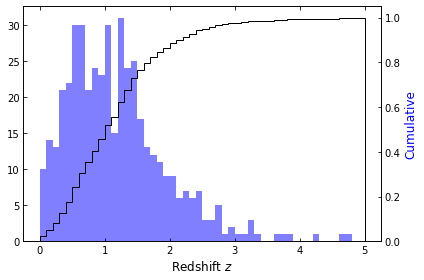

In [6]:
fig, ax0 = plt.subplots()

bins = np.arange(0, 5.1, 0.1)

ax0.hist(r2o_z["z"], bins=bins, histtype="stepfilled",
         color="b", alpha=0.5)

ax2 = ax0.twinx()  # instantiate a second axes that shares the same x-axis

ax2.set_ylabel("Cumulative", color="b", fontsize=12)
ax2.hist(r2o_z["z"], bins=bins, histtype="step", 
         color="k", cumulative=True, density=True)

ax0.set_xlabel("Redshift $z$", fontsize=12)

plt.tight_layout()

In [7]:
mask = (r2o_z["z"] < 1.5) & (r2o_z["z"] > 0.5)
len(r2o_z[mask]) / len(r2o_z)

0.5526315789473685

# 1 scatter plot

## 1.1 angular separation vs. redshift

In [8]:
keys = "z"
r2o_z.sort(keys)

x = np.array(r2o_z[keys])
y_sx = np.array(r2o_z["ang_sep_sx_cor"])
y_k = np.array(r2o_z["ang_sep_k_cor"])
y_xka = np.array(r2o_z["ang_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

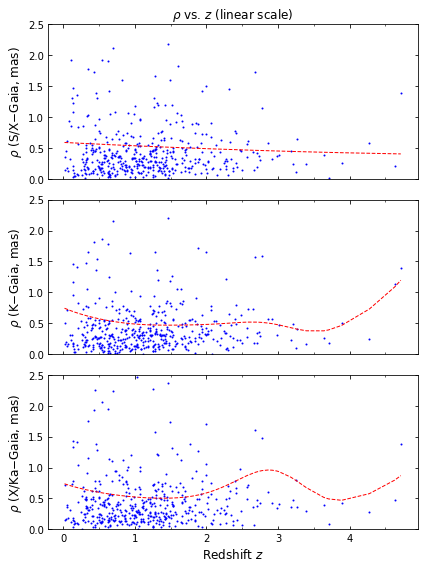

In [9]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("Redshift $z$", fontsize=12)
ax0.set_title("$\\rho$ vs. $z$ (linear scale)")

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax0.set_ylim([0, 2.5])

plt.subplots_adjust()
plt.tight_layout()
# plt.savefig("../plots/rho-z.eps")

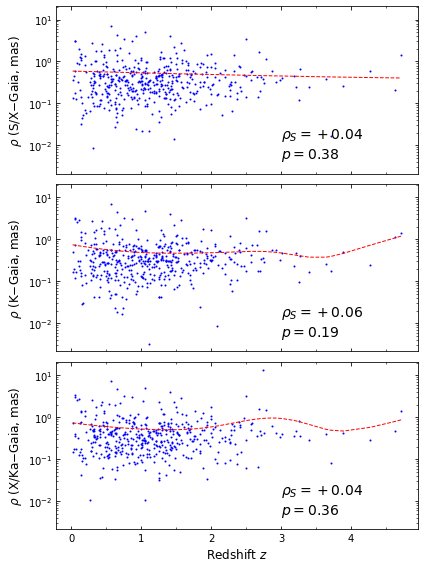

In [10]:
# Distribution of angular separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 8), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$\\rho$ (S/X$-$Gaia, mas)", fontsize=12)
ax1.set_ylabel("$\\rho$ (K$-$Gaia, mas)", fontsize=12)
ax2.set_ylabel("$\\rho$ (X/Ka$-$Gaia, mas)", fontsize=12)
ax2.set_xlabel("Redshift $z$", fontsize=12)

cordx1, cordy1 = 3, 0.015
cordx2, cordy2 = 3, 0.005

ax0.text(cordx1, cordy1, "$\\rho_S=+0.04$", fontsize=14)
ax0.text(cordx1, cordy2, "$p=0.38$", fontsize=14)

ax1.text(cordx1, cordy1, "$\\rho_S=+0.06$", fontsize=14)
ax1.text(cordx1, cordy2, "$p=0.19$", fontsize=14)

ax2.text(cordx1, cordy1, "$\\rho_S=+0.04$", fontsize=14)
ax2.text(cordx1, cordy2, "$p=0.36$", fontsize=14)

ax0.set_yscale("log")

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

plt.subplots_adjust()
plt.tight_layout()
plt.savefig("../plots/rho-z.eps")

In [11]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="Rho vs. z",
              ylabel=["SX", "K", "XKa"])

Rho vs. z
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          -5.0e-02   2.9e-01  +4.1e-02   3.8e-01  +2.8e-02   3.7e-01
K           -4.5e-02   3.4e-01  +6.1e-02   1.9e-01  +4.1e-02   1.9e-01
XKa         +2.3e-02   6.3e-01  +4.3e-02   3.6e-01  +3.0e-02   3.4e-01
-----------------------------------------------------------------
Smoothed
SX          -9.9e-01   0.0e+00  -1.0e+00   0.0e+00  -1.0e+00  2.8e-223
K           -3.7e-01   3.4e-16  -7.4e-01   1.0e-80  -6.4e-01   1.5e-93
XKa         +2.6e-01   1.4e-08  -2.7e-01   5.5e-09  -3.4e-01   4.2e-28
-----------------------------------------------------------------


In [12]:
keys = "z"
r2o_z.sort(keys)

x = np.array(r2o_z[keys])
y_sx = np.array(r2o_z["nor_sep_sx_cor"])
y_k = np.array(r2o_z["nor_sep_k_cor"])
y_xka = np.array(r2o_z["nor_sep_ka_cor"])

nw_mean_sx = NWSmooth(x, y_sx)
nw_mean_k = NWSmooth(x, y_k)
nw_mean_xka = NWSmooth(x, y_xka)

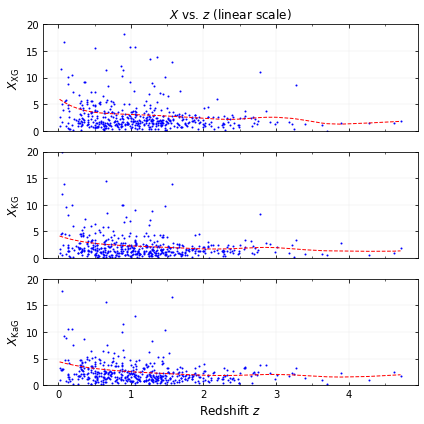

In [13]:
# Distribution of Normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax1.set_ylabel("$X_\\mathrm{KG}$ ", fontsize=12)
ax2.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax2.set_xlabel("Redshift $z$", fontsize=12)

# posx, posy = 0.02, 0.01
# ax0.text(posx, posy, "$X$-band", fontsize=12)
# ax1.text(posx, posy, "$K$-band", fontsize=12)
# ax2.text(posx, posy, "$Ka$-band", fontsize=12)

ax0.set_title("$X$ vs. $z$ (linear scale)")

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))
ax0.set_ylim([0, 20])

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax0.grid(lw=0.1)
ax1.grid(lw=0.1)
ax2.grid(lw=0.1)

plt.tight_layout()
plt.subplots_adjust()

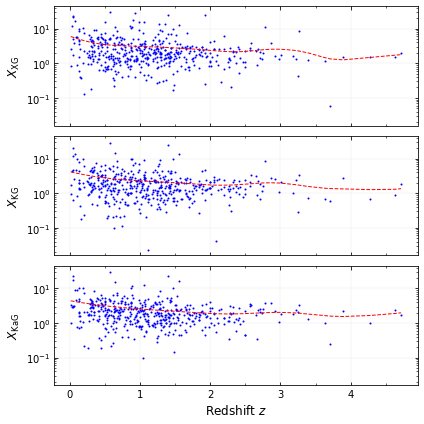

In [14]:
# Distribution of Normalized separation
fig, (ax0, ax1, ax2) = plt.subplots(figsize=(6, 6), nrows=3, sharex=True, sharey=True)

ax0.plot(x, y_sx, "b.", ms=2)
ax1.plot(x, y_k, ".b", ms=2)
ax2.plot(x, y_xka, "b.", ms=2)

# Smoothed data
ax0.plot(x, nw_mean_sx, "r--", lw=1)
ax1.plot(x, nw_mean_k, "r--", lw=1)
ax2.plot(x, nw_mean_xka, "r--", lw=1)

ax0.set_ylabel("$X_\\mathrm{XG}$", fontsize=12)
ax1.set_ylabel("$X_\\mathrm{KG}$ ", fontsize=12)
ax2.set_ylabel("$X_\\mathrm{KaG}$", fontsize=12)
ax2.set_xlabel("Redshift $z$", fontsize=12)

# posx, posy = 0.02, 0.01
# ax0.text(posx, posy, "$X$-band", fontsize=12)
# ax1.text(posx, posy, "$K$-band", fontsize=12)
# ax2.text(posx, posy, "$Ka$-band", fontsize=12)

ax0.set_yscale("log")
# ax0.set_xscale("log")

ax2.xaxis.set_minor_locator(MultipleLocator(0.5))

ax0.grid(lw=0.1)
ax1.grid(lw=0.1)
ax2.grid(lw=0.1)

plt.tight_layout()
plt.subplots_adjust()

In [15]:
new_corr_test(x, [y_sx, y_k, y_xka], [nw_mean_sx, nw_mean_k, nw_mean_xka],
              obj_name="X vs. z",
              ylabel=["SX", "K", "XKa"])

X vs. z
            Pearson    p-val    Spearman    p-val    Kendall    p-val
-----------------------------------------------------------------
Original
-----------------------------------------------------------------
SX          -1.5e-01   1.3e-03  -1.5e-01   1.4e-03  -1.0e-01   1.3e-03
K           -1.6e-01   4.3e-04  -1.6e-01   6.4e-04  -1.0e-01   8.2e-04
XKa         -1.9e-01   6.2e-05  -2.2e-01   2.2e-06  -1.4e-01   4.5e-06
-----------------------------------------------------------------
Smoothed
SX          -8.4e-01  1.0e-124  -1.0e+00   0.0e+00  -9.8e-01  5.6e-215
K           -8.5e-01  4.7e-127  -9.9e-01   0.0e+00  -9.6e-01  1.5e-206
XKa         -8.6e-01  7.5e-137  -9.9e-01   0.0e+00  -9.7e-01  3.5e-211
-----------------------------------------------------------------
